![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
sys.path.append('/Users/dodkins/PythonProjects/stocks/options_testing/options_testing')

import os
from datetime import datetime 
import pandas as pd
import opstrat as op

In [5]:
from qc_simulator import QuantBook, Resolution, OptionRight

In [6]:
import quantconnect
# from strategies import measure_period_profit
# from strategies import add_expirations

In [7]:
qbw = quantconnect.QuantBookWrapper({'qb':QuantBook(),'Resolution':Resolution,'OptionRight':OptionRight})

In [8]:
from strategies import measure_period_profit, LegMeta, StrategyBase
import plots

In [9]:
# def IC_sim(nbars=200, stop_loss=20, stop_gain=None):
#     tsla = qbw.get_tsla(nbars)
#     legs = [
#         LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
#         LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
#         LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
#         LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
#     ]  
#     strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=stop_loss, stop_gain=stop_gain, force_strike_diff=True)
#     ic = measure_period_profit(tsla,  
#         strat,
#         expiration='week',
#         update_freq='candle', 
#         combine_legs=True)
#     plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])
#     plots.plot_candles_and_profit(
#         ic, lines=[f'{l.name}_strike' for l in strat.legs if 'sell' == l.trans], 
#         metrics=['strategy_close', 'stop_loss', 'stop_gain']
#     )
#     return ic

In [11]:
stop_loss=None
stop_gain=None
nbars=200

In [12]:
tsla = qbw.get_tsla(nbars)
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
    LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
    LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
]  
strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=stop_loss, stop_gain=stop_gain, force_strike_diff=True)
ic = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='candle', 
    combine_legs=True)
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])
plots.plot_candles_and_profit(
    ic, lines=[f'{l.name}_strike' for l in strat.legs if 'sell' == l.trans], 
    metrics=['strategy_close', 'stop_loss', 'stop_gain']
)

lol


In [31]:
ic

underlying_open  underlying_high  underlying_low  underlying_close   
0         304.746636       309.109969      303.333303        307.993303  \
1         307.943303       308.416636      306.036636        307.446636   
2         307.473303       309.466636      306.823303        307.983303   
3         307.993303       308.756636      307.296636        307.396636   
4         311.236636       313.626635      308.866636        311.539969   
..               ...              ...             ...               ...   
195       293.680000       293.990000      290.400000        291.000000   
196       291.000000       293.280000      290.670000        292.300000   
197       292.270000       295.500000      291.780000        294.830000   
198       294.830000       295.970000      293.000000        294.100000   
199       294.120000       294.990000      291.400000        292.130000   

         volume  strategy_open  strategy_close  hourly_profit   
0    10662028.0       0.002239        0.004340       0.000000  \
1     6186187.0       0.003898        0.003468       0.000872   
2     7723828.0       0.003154        0.003566      -0.000098   
3    10598359.0       0.003229        0.002788       0.000778   
4    14604838.0       0.000738        0.000822       0.001966   
..          ...            ...             ...            ...   
195   7883773.0       0.019818        0.030887      -0.010047   
196   5298142.0       0.029495        0.023534       0.007353   
197   9703434.0       0.022493        0.015039       0.008495   
198   7136008.0       0.014187        0.015778      -0.000739   
199  10745308.0       0.014847        0.020782      -0.005004   

                   date  week  ...  prev_strat_end   sell_call_15_0_exp   
0   2022-08-03 13:00:00    31  ...               0  2022-08-05 00:00:00  \
1   2022-08-03 14:00:00    31  ...               0                  NaN   
2   2022-08-03 15:00:00    31  ...               0                  NaN   
3   2022-08-03 16:00:00    31  ...               0                  NaN   
4   2022-08-04 10:00:00    31  ...               0                  NaN   
..                  ...   ...  ...             ...                  ...   
195 2022-09-13 12:00:00    37  ...               0                  NaN   
196 2022-09-13 13:00:00    37  ...               0                  NaN   
197 2022-09-13 14:00:00    37  ...               0                  NaN   
198 2022-09-13 15:00:00    37  ...               0                  NaN   
199 2022-09-13 16:00:00    37  ...               0                  NaN   

       buy_call_16_0_exp   sell_put_-15_0_exp    buy_put_-16_0_exp   
0    2022-08-05 00:00:00  2022-08-05 00:00:00  2022-08-05 00:00:00  \
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
4                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
195                  NaN                  NaN                  NaN   
196                  NaN                  NaN                  NaN   
197                  NaN                  NaN                  NaN   
198                  NaN                  NaN                  NaN   
199                  NaN                  NaN                  NaN   

    sell_call_15_0_strike buy_call_16_0_strike  sell_put_-15_0_strike   
0                   351.0                357.0                  261.0  \
1                   351.0                357.0                  261.0   
2                   351.0                357.0                  261.0   
3                   351.0                357.0                  261.0   
4                   351.0                357.0                  261.0   
..                    ...                  ...                    ...   
195                 347.0                353.0                  257.0 

In [27]:
fig = plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])

In [30]:
import plotly.io as pio
pio.write_image(fig, 'image.png',scale=1, width=900, height=350)

In [11]:
ic = IC_sim(stop_loss=None)

lol


In [ ]:
import plotly.io as pio
pio.write_image(fig, 'image.pdf',scale=6, width=1080, height=1080)

In [19]:
qb = QuantBook()
tsla = qb.AddEquity("TSLA")
equity_symbol = tsla.Symbol

In [42]:
from strategies import measure_period_profit, LegMeta, StrategyBase
import plots
import numpy as np

In [45]:
def monte_carlo(strategy, qbw, duration_weeks=10, num_tests=10, database='offline'):
    # tsla_start = datetime(2010,6,29,10,0)
    tsla_start = datetime(2020,9,5,10,0)
    if database == 'offline':
        tsla_end = datetime(2022,9,13,16,0)
    elif database == 'cloud':
        tsla_end = datetime.now() - timedelta(days=2)

    duration_days = duration_weeks*7
    final_end = tsla_end - timedelta(days=duration_days)
    max_span = (final_end - tsla_start).days
    # random.seed(42)
    # start_days = random.sample(range(0, max_span), num_tests)
    start_days = np.linspace(0, max_span, num_tests)

    profits = []
    for start_day in start_days:
        start = tsla_start + timedelta(days=start_day)
        end = start + timedelta(days=duration_days)
        print(start, end)
        tsla = qbw.get_tsla(start=start, end=end)
        performance = measure_period_profit(tsla,  
            strategy,
            expiration='week',
            update_freq='once',
            combine_legs=True,
            skip_hours=(0,1)
        )
        profit = performance[['date', 'running_profit']]
        profits.append(profit)
        plots.plot_candles_and_profit(performance, lines=[f'{l.name}_strike' for l in strategy.legs])

    plots.plot_profits(profits, offsets=start_days)
    return profits

In [22]:
import random

In [23]:
from plots import overlap_plots

In [58]:
def show_expectation(sell_offset=2, buy_offset=3, stop_loss=None, num_test=5, duration_weeks=5):
    legs = [
        LegMeta(trans='sell', contract='call', strike_offset= sell_offset, exp_offset= 0),
        LegMeta(trans='buy',  contract='call', strike_offset= buy_offset, exp_offset= 0),
        LegMeta(trans='sell', contract='put', strike_offset= -sell_offset, exp_offset= 0),
        LegMeta(trans='buy',  contract='put', strike_offset= -buy_offset, exp_offset= 0),
    ] 
    strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=stop_loss, stop_gain=None, force_strike_diff=True)
    nostop_profits = monte_carlo(strat, qbw, duration_weeks=duration_weeks, num_tests=num_test, database='offline')
    # overlap_plots(nostop_profits, offsets=range(len(nostop_profits)))
    plt.figure()
    plt.hist([df['running_profit'].iloc[-1] for df in nostop_profits], bins=20)
    plt.axvline(np.mean([df['running_profit'].iloc[-1] for df in nostop_profits]))
    plt.title(f'{sell_offset} {buy_offset} {stop_loss}')
    plt.show()
    return nostop_profits

In [26]:
from datetime import timedelta

2020-09-05 10:00:00 2020-10-10 10:00:00


2021-02-28 04:00:00 2021-04-04 04:00:00


2021-08-22 22:00:00 2021-09-26 22:00:00


2022-02-14 16:00:00 2022-03-21 16:00:00


2022-08-09 10:00:00 2022-09-13 10:00:00


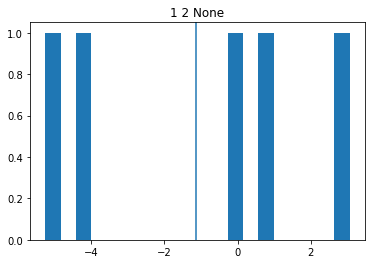

2020-09-05 10:00:00 2020-10-10 10:00:00


2021-02-28 04:00:00 2021-04-04 04:00:00


2021-08-22 22:00:00 2021-09-26 22:00:00


2022-02-14 16:00:00 2022-03-21 16:00:00


2022-08-09 10:00:00 2022-09-13 10:00:00


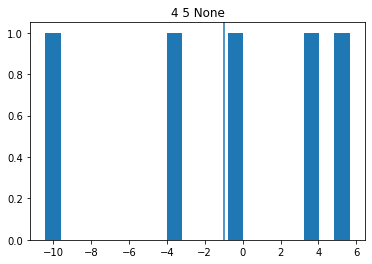

In [57]:
# for offsets in [[1,2], [2,3], [4,5], [8,9], [16,17], [32,33]]:
for offsets in [[1,2], [4,5]]: #, [8,9], [16,17], [32,33]]:
    show_expectation(offsets[0], offsets[1], None, num_test=5)

2020-09-05 10:00:00 2020-09-26 10:00:00
lol
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L72:  126.66666666666667 2020-09-08 00:00:00
L72:  129.33333333333334 2020-09-08 00:00:00
L72:  108.0 2020-09-08 00:00:00
L72:  105.33333333333333 2020-09-08 00:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L72:  137.0 2020-09-14 00:00:00
L72:  139.33333333333334 2020-09-14 00:00:00
L72:  116.0 2020-09-14 00:00:00
L72:  113.66666666666667 2020-09-14 00:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L72:  162.0 2020-09-21 00:00:00
L72:  165.0 2020-09-21 00:00:00
L72:  138.0 2020-09-21 00:00:00
L72:  135.0 2020-09-21 00:00:00


2021-03-03 16:00:00 2021-03-24 16:00:00
lol
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L72:  241.33333333333334 2021-03-03 00:00:00
L72:  246.0 2021-03-03 00:00:00
L72:  204.0 2021-03-03 00:00:00
L72:  199.33333333333334 2021-03-03 00:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L72:  217.0 2021-03-08 00:00:00
L72:  221.0 2021-03-08 00:00:00
L72:  185.0 2021-03-08 00:00:00
L72:  181.0 2021-03-08 00:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L72:  248.66666666666666 2021-03-15 00:00:00
L72:  253.33333333333334 2021-03-15 00:00:00
L72:  211.33333333333334 2021-03-15 00:00:00
L72:  206.66666666666666 2021-03-15 00:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L72:  247.33333333333334 2021-03-22 00:00:00
L72:  251.66666666666666 2021-03-

2021-08-29 22:00:00 2021-09-19 22:00:00
lol
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L72:  256.6666666666667 2021-08-30 00:00:00
L72:  261.3333333333333 2021-08-30 00:00:00
L72:  219.33333333333334 2021-08-30 00:00:00
L72:  214.66666666666666 2021-08-30 00:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L72:  267.0 2021-09-07 00:00:00
L72:  272.0 2021-09-07 00:00:00
L72:  227.0 2021-09-07 00:00:00
L72:  222.0 2021-09-07 00:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L72:  265.0 2021-09-13 00:00:00
L72:  270.0 2021-09-13 00:00:00
L72:  225.0 2021-09-13 00:00:00
L72:  220.0 2021-09-13 00:00:00


2022-02-25 04:00:00 2022-03-18 04:00:00
lol
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L72:  293.0 2022-02-25 00:00:00
L72:  298.0 2022-02-25 00:00:00
L72:  248.0 2022-02-25 00:00:00
L72:  243.0 2022-02-25 00:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L72:  294.6666666666667 2022-02-28 00:00:00
L72:  300.0 2022-02-28 00:00:00
L72:  252.0 2022-02-28 00:00:00
L72:  246.66666666666666 2022-02-28 00:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L72:  311.0 2022-03-07 00:00:00
L72:  316.6666666666667 2022-03-07 00:00:00
L72:  265.6666666666667 2022-03-07 00:00:00
L72:  260.0 2022-03-07 00:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L72:  281.0 2022-03-14 00:00:00
L72:  286.3333333333333 2022-03-14 00:00:00
L72:  238.33333333333334 2022-0

2022-08-23 10:00:00 2022-09-13 10:00:00
lol
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L72:  317.3333333333333 2022-08-23 00:00:00
L72:  323.0 2022-08-23 00:00:00
L72:  266.3333333333333 2022-08-23 00:00:00
L72:  260.6666666666667 2022-08-23 00:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L72:  316.0 2022-08-25 00:00:00
L72:  322.0 2022-08-25 00:00:00
L72:  268.0 2022-08-25 00:00:00
L72:  262.0 2022-08-25 00:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L72:  307.0 2022-08-29 00:00:00
L72:  313.0 2022-08-29 00:00:00
L72:  259.0 2022-08-29 00:00:00
L72:  253.0 2022-08-29 00:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L72:  295.0 2022-09-06 00:00:00
L72:  300.0 2022-09-06 00:00:00
L72:  250.0 2022-09-06 00:00:00
L72:  245.0 2022-09-06 0

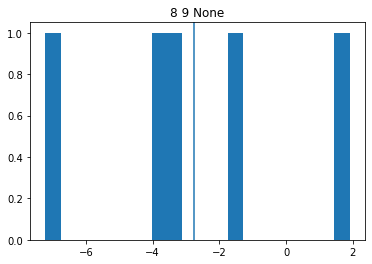

2020-09-05 10:00:00 2020-09-26 10:00:00
lol
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L72:  137.33333333333334 2020-09-08 00:00:00
L72:  140.0 2020-09-08 00:00:00
L72:  100.0 2020-09-08 00:00:00
L72:  97.33333333333333 2020-09-08 00:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L72:  146.33333333333334 2020-09-14 00:00:00
L72:  148.66666666666666 2020-09-14 00:00:00
L72:  106.66666666666667 2020-09-14 00:00:00
L72:  104.33333333333333 2020-09-14 00:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L72:  174.0 2020-09-21 00:00:00
L72:  177.0 2020-09-21 00:00:00
L72:  126.0 2020-09-21 00:00:00
L72:  123.0 2020-09-21 00:00:00


2021-03-03 16:00:00 2021-03-24 16:00:00
lol
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L72:  260.0 2021-03-03 00:00:00
L72:  264.6666666666667 2021-03-03 00:00:00
L72:  185.33333333333334 2021-03-03 00:00:00
L72:  180.66666666666666 2021-03-03 00:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L72:  233.0 2021-03-08 00:00:00
L72:  237.0 2021-03-08 00:00:00
L72:  169.0 2021-03-08 00:00:00
L72:  165.0 2021-03-08 00:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L72:  267.3333333333333 2021-03-15 00:00:00
L72:  272.0 2021-03-15 00:00:00
L72:  192.66666666666666 2021-03-15 00:00:00
L72:  188.0 2021-03-15 00:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L72:  264.6666666666667 2021-03-22 00:00:00
L72:  269.0 2021-03-22 00:00:00
L72:  191.0 2021-

2021-08-29 22:00:00 2021-09-19 22:00:00
lol
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L72:  275.3333333333333 2021-08-30 00:00:00
L72:  280.0 2021-08-30 00:00:00
L72:  200.66666666666666 2021-08-30 00:00:00
L72:  196.0 2021-08-30 00:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L72:  287.0 2021-09-07 00:00:00
L72:  292.0 2021-09-07 00:00:00
L72:  207.0 2021-09-07 00:00:00
L72:  202.0 2021-09-07 00:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L72:  285.0 2021-09-13 00:00:00
L72:  290.0 2021-09-13 00:00:00
L72:  205.0 2021-09-13 00:00:00
L72:  200.0 2021-09-13 00:00:00


2022-02-25 04:00:00 2022-03-18 04:00:00
lol
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L72:  313.0 2022-02-25 00:00:00
L72:  318.0 2022-02-25 00:00:00
L72:  228.0 2022-02-25 00:00:00
L72:  223.0 2022-02-25 00:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L72:  316.0 2022-02-28 00:00:00
L72:  321.3333333333333 2022-02-28 00:00:00
L72:  230.66666666666666 2022-02-28 00:00:00
L72:  225.33333333333334 2022-02-28 00:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L72:  333.6666666666667 2022-03-07 00:00:00
L72:  339.3333333333333 2022-03-07 00:00:00
L72:  237.33333333333334 2022-03-07 00:00:00
L72:  231.66666666666666 2022-03-07 00:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L72:  302.3333333333333 2022-03-14 00:00:00
L72:  307.6666666666667 

2022-08-23 10:00:00 2022-09-13 10:00:00
lol
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L72:  340.0 2022-08-23 00:00:00
L72:  345.6666666666667 2022-08-23 00:00:00
L72:  243.66666666666666 2022-08-23 00:00:00
L72:  238.0 2022-08-23 00:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L72:  340.0 2022-08-25 00:00:00
L72:  346.0 2022-08-25 00:00:00
L72:  244.0 2022-08-25 00:00:00
L72:  238.0 2022-08-25 00:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L72:  331.0 2022-08-29 00:00:00
L72:  337.0 2022-08-29 00:00:00
L72:  235.0 2022-08-29 00:00:00
L72:  229.0 2022-08-29 00:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L72:  315.0 2022-09-06 00:00:00
L72:  320.0 2022-09-06 00:00:00
L72:  230.0 2022-09-06 00:00:00
L72:  225.0 2022-09-06 00:00:00
L38

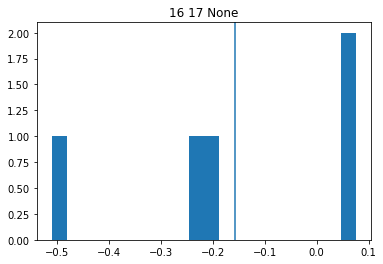

2020-09-05 10:00:00 2020-09-26 10:00:00
lol
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L38:  2020-09-08 10:00:00
L72:  156.0 2020-09-08 00:00:00
L72:  158.66666666666666 2020-09-08 00:00:00
L72:  81.33333333333333 2020-09-08 00:00:00
L72:  78.66666666666667 2020-09-08 00:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L38:  2020-09-14 10:00:00
L72:  167.33333333333334 2020-09-14 00:00:00
L72:  169.66666666666666 2020-09-14 00:00:00
L72:  85.66666666666667 2020-09-14 00:00:00
L72:  83.33333333333333 2020-09-14 00:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L38:  2020-09-21 10:00:00
L72:  198.0 2020-09-21 00:00:00
L72:  201.0 2020-09-21 00:00:00
L72:  102.0 2020-09-21 00:00:00
L72:  99.0 2020-09-21 00:00:00


2021-03-03 16:00:00 2021-03-24 16:00:00
lol
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L38:  2021-03-03 16:00:00
L72:  292.6666666666667 2021-03-03 00:00:00
L72:  297.3333333333333 2021-03-03 00:00:00
L72:  152.66666666666666 2021-03-03 00:00:00
L72:  148.0 2021-03-03 00:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L38:  2021-03-08 10:00:00
L72:  265.0 2021-03-08 00:00:00
L72:  269.0 2021-03-08 00:00:00
L72:  137.0 2021-03-08 00:00:00
L72:  133.0 2021-03-08 00:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L38:  2021-03-15 10:00:00
L72:  304.6666666666667 2021-03-15 00:00:00
L72:  309.3333333333333 2021-03-15 00:00:00
L72:  155.33333333333334 2021-03-15 00:00:00
L72:  150.66666666666666 2021-03-15 00:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L38:  2021-03-22 10:00:00
L72:  299.3333333333333 2021-03-22 00:00:00
L72:  303.6666666666667 2

2021-08-29 22:00:00 2021-09-19 22:00:00
lol
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L38:  2021-08-30 10:00:00
L72:  312.6666666666667 2021-08-30 00:00:00
L72:  317.3333333333333 2021-08-30 00:00:00
L72:  163.33333333333334 2021-08-30 00:00:00
L72:  158.66666666666666 2021-08-30 00:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L38:  2021-09-07 10:00:00
L72:  327.0 2021-09-07 00:00:00
L72:  332.0 2021-09-07 00:00:00
L72:  167.0 2021-09-07 00:00:00
L72:  162.0 2021-09-07 00:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L38:  2021-09-13 10:00:00
L72:  325.0 2021-09-13 00:00:00
L72:  330.0 2021-09-13 00:00:00
L72:  170.0 2021-09-13 00:00:00
L72:  165.0 2021-09-13 00:00:00


2022-02-25 04:00:00 2022-03-18 04:00:00
lol
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L38:  2022-02-24 10:00:00
L72:  358.0 2022-02-25 00:00:00
L72:  363.0 2022-02-25 00:00:00
L72:  183.0 2022-02-25 00:00:00
L72:  178.0 2022-02-25 00:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L38:  2022-02-28 10:00:00
L72:  358.6666666666667 2022-02-28 00:00:00
L72:  364.0 2022-02-28 00:00:00
L72:  182.66666666666666 2022-02-28 00:00:00
L72:  177.33333333333334 2022-02-28 00:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L38:  2022-03-07 10:00:00
L72:  379.0 2022-03-07 00:00:00
L72:  384.6666666666667 2022-03-07 00:00:00
L72:  192.0 2022-03-07 00:00:00
L72:  186.33333333333334 2022-03-07 00:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L38:  2022-03-14 10:00:00
L72:  345.0 2022-03-14 00:00:00
L72:  350.3333333333333 2022-03-14 00:00:00
L72:  179.6666666

2022-08-23 10:00:00 2022-09-13 10:00:00
lol
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L38:  2022-08-23 10:00:00
L72:  385.3333333333333 2022-08-23 00:00:00
L72:  391.0 2022-08-23 00:00:00
L72:  198.33333333333334 2022-08-23 00:00:00
L72:  192.66666666666666 2022-08-23 00:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L38:  2022-08-25 10:00:00
L72:  382.0 2022-08-25 00:00:00
L72:  388.0 2022-08-25 00:00:00
L72:  196.0 2022-08-25 00:00:00
L72:  190.0 2022-08-25 00:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L38:  2022-08-29 10:00:00
L72:  373.0 2022-08-29 00:00:00
L72:  379.0 2022-08-29 00:00:00
L72:  193.0 2022-08-29 00:00:00
L72:  187.0 2022-08-29 00:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L38:  2022-09-06 10:00:00
L72:  360.0 2022-09-06 00:00:00
L72:  365.0 2022-09-06 00:00:00
L72:  185.0 2022-09-06 00:00:00
L72:  180.0 2022-09-06

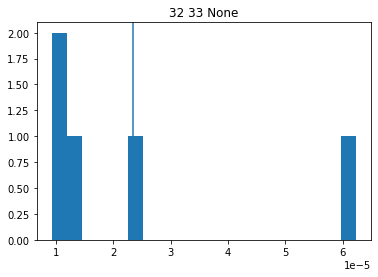

In [73]:
# for offsets in [[1,2], [2,3], [4,5], [8,9], [16,17], [32,33]]:
for offsets in [[8,9], [16,17], [32,33]]:
    show_expectation(offsets[0], offsets[1], None, num_test=5, duration_weeks=3)

In [55]:
# for offsets in [[1,2], [2,3], [4,5], [8,9], [16,17], [32,33]]:
for offsets in [[1,2], [4,5]]: #, [8,9], [16,17], [32,33]]:
    show_expectation(offsets[0], offsets[1], None, num_test=5)

2020-09-05 10:00:00 2020-10-10 10:00:00


2021-05-04 16:00:00 2021-06-08 16:00:00


2021-12-31 22:00:00 2022-02-04 22:00:00


KeyboardInterrupt: 

In [52]:
start = datetime(2023,4,28,10,0)
end = datetime(2023,6,2,10,0)
tsla = qbw.get_tsla(start=start, end=end)

In [51]:
tsla

Empty DataFrame
Columns: [open, high, low, close, volume]
Index: []

In [11]:
from utils import pretty_strat_df
pretty_strat_df(ic)

underlying open  underlying close  strategy open  strategy close  \
0             304.75            307.99           0.00            0.00   
1             307.94            307.45           0.00            0.00   
2             307.47            307.98           0.00            0.00   
3             307.99            307.40           0.00            0.00   
4             311.24            311.54           0.00            0.00   
..               ...               ...            ...             ...   
195           293.68            291.00           0.02            0.03   
196           291.00            292.30           0.03            0.02   
197           292.27            294.83           0.02            0.01   
198           294.83            294.10           0.01            0.01   
199           294.12            292.13           0.01            0.02   

     hourly profit                date   dte  new option early stop stop loss  \
0            -0.00 2022-08-03 13:00:00  2.12        True       loss  0.002687   
1            -0.00 2022-08-03 14:00:00  2.08        True      False  0.001269   
2             0.00 2022-08-03 15:00:00  2.04       False      False  0.001269   
3             0.00 2022-08-03 16:00:00  2.00       False      False  0.001269   
4             0.00 2022-08-04 10:00:00  1.25       False      False  0.001269   
..             ...                 ...   ...         ...        ...       ...   
195          -0.01 2022-09-13 12:00:00  3.17       False      False  0.037472   
196           0.01 2022-09-13 13:00:00  3.12       False      False  0.037472   
197           0.01 2022-09-13 14:00:00  3.08       False      False  0.037472   
198          -0.00 2022-09-13 15:00:00  3.04       False      False  0.037472   
199          -0.01 2022-09-13 16:00:00  3.00       False      False  0.037472   

     ... prev strat end   sell call 15 0 exp    buy call 16 0 exp  \
0    ...            0.0  2022-08-05 00:00:00  2022-08-05 00:00:00   
1    ...           -0.0  2022-08-05 00:00:00  2022-08-05 00:00:00   
2    ...            0.0                  NaN                  NaN   
3    ...            0.0                  NaN                  NaN   
4    ...            0.0                  NaN                  NaN   
..   ...            ...                  ...                  ...   
195  ...            0.0                  NaN                  NaN   
196  ...            0.0                  NaN                  NaN   
197  ...            0.0                  NaN                  NaN   
198  ...            0.0                  NaN                  NaN   
199  ...            0.0                  NaN                  NaN   

      sell put -15 0 exp    buy put -16 0 exp sell call 15 0 strike  \
0    2022-08-05 00:00:00  2022-08-05 00:00:00                 351.0   
1    2022-08-05 00:00:00  2022-08-05 00:00:00                 357.0   
2                    NaN                  NaN                 357.0   
3                    NaN                  NaN                 357.0   
4                    NaN                  NaN                 357.0   
..                   ...                  ...                   ...   
195                  NaN                  NaN                 353.0   
196                  NaN                  NaN                 353.0   
197                  NaN                  NaN                 353.0   
198                  NaN                  NaN                 353.0   
199                  NaN                  NaN                 353.0   

    buy call 16 0 strike  sell put -15 0 strike  buy put -16 0 strike  \
0                  357.0                  261.0                 255.0   
1                  363.0                  261.0                 255.0   
2                  363.0                  261.0                 255.0   
3                  363.0                  261.0                 255.0   
4                  363.0                  261.0                 255.0   
..                   ...           

In [12]:
np.where(ic['close_previous'])

(array([  1,  19,  24,  54,  56,  57, 128, 161, 172, 173, 174, 187]),)

In [13]:
np.where(ic['early_stop'])

(array([  0,  18,  23,  53,  55,  56, 127, 160, 171, 172, 173, 186]),)

In [14]:
ic = IC_sim(stop_loss=50)

0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.000775826972230618 0.000775826972230618 open
0.00016456745367057304 0.00016456745367057304 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.000775826972230618 0.000775826972230618 open
0.00016456745367057304 0.00016456745367057304 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.000775826972230618 0.000775826972230618 open
0.00016456745367057304 0.00016456745367057304 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.000775826972230618 0.000775826972230618 open
0.00016456745367057304 0.00016456745367057304 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.000775826972230618 0.00077582697

In [15]:
ic = IC_sim(stop_loss=200)

0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.0

In [16]:
pretty_strat_df(ic.loc[np.where(ic['early_stop'])])

Empty DataFrame
Columns: [underlying open, underlying close, strategy open, strategy close, hourly profit, date, dte, new option, early stop, stop loss, stop gain, close previous, prev strat end, sell call 15 0 exp, buy call 16 0 exp, sell put -15 0 exp, buy put -16 0 exp, sell call 15 0 strike, buy call 16 0 strike, sell put -15 0 strike, buy put -16 0 strike, running profit]
Index: []

[0 rows x 22 columns]

In [14]:
ic = IC_sim(stop_loss=100)

In [15]:
ic = IC_sim(stop_loss=50)

In [16]:
ic = IC_sim(stop_loss=None, stop_gain=50)

In [17]:
ic = IC_sim(stop_loss=None, stop_gain=None)

In [17]:
def IC_sim(nbars=200, stop_loss=20, stop_gain=None):
    tsla = qbw.get_tsla(nbars)
    legs = [
        LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
        LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
        LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
        LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
    ]  
    strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=stop_loss, stop_gain=stop_gain, force_strike_diff=True)
    ic = measure_period_profit(tsla,  
        strat,
        expiration='week',
        update_freq='candle', 
        combine_legs=False)
    plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])
    plots.plot_candles_and_profit(
        ic, lines=[f'{l.name}_strike' for l in strat.legs if 'sell' == l.trans], 
        metrics=['strategy_close', 'stop_loss', 'stop_gain']
    )
    return ic

In [18]:
ic = IC_sim(stop_loss=None, stop_gain=None)

0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.000775826972230618 0.000775826972230618 open
0.0007390817596976407 0.0007390817596976407 open
8.11408067646624e-05 8.11408067646624e-05 open
0.003299857698550124 0.003299857698550124 open
0.0

In [19]:
ic = IC_sim(stop_loss=None, stop_gain=None)

In [20]:
np.mean([20, 0.18, 0.1])

6.760000000000001

In [21]:
np.median([20, 0.18, 0.1])

0.18